# <center style="color: dodgerblue; font-size: 36px">The Exploratory Data Analysis</center>

## <center>Data Science and Business Analytics</center>
## <center>Author: Anna Kryna</center>
### <center>GRIP SEPTEMBER22 - The Sparks Foundation</center>

##### <center>The Exploratory Data Analysis is performed on Retail SuperStore dataset to derive insights about weak areas and identify locations to increase business profits through deep analysis of business data</center>

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Extraction database from csv file

In [2]:
db = pd.read_csv('SampleSuperstore.csv')

### Information about database

In [3]:
db.shape

(9994, 13)

In [4]:
db.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
db.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [6]:
db.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2143,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19140,East,Technology,Phones,23.988,2,0.4,-4.7976
610,First Class,Corporate,United States,Dallas,Texas,75217,Central,Technology,Phones,369.576,3,0.2,41.5773
2709,Standard Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Machines,1919.976,3,0.2,215.9973
1806,First Class,Corporate,United States,Los Angeles,California,90049,West,Office Supplies,Paper,45.360,7,0.0,21.7728
3682,Standard Class,Consumer,United States,Clinton,Maryland,20735,East,Office Supplies,Art,79.360,4,0.0,32.5376


### Adding a count column

In [7]:
db.insert(1, 'Number', 1, True)

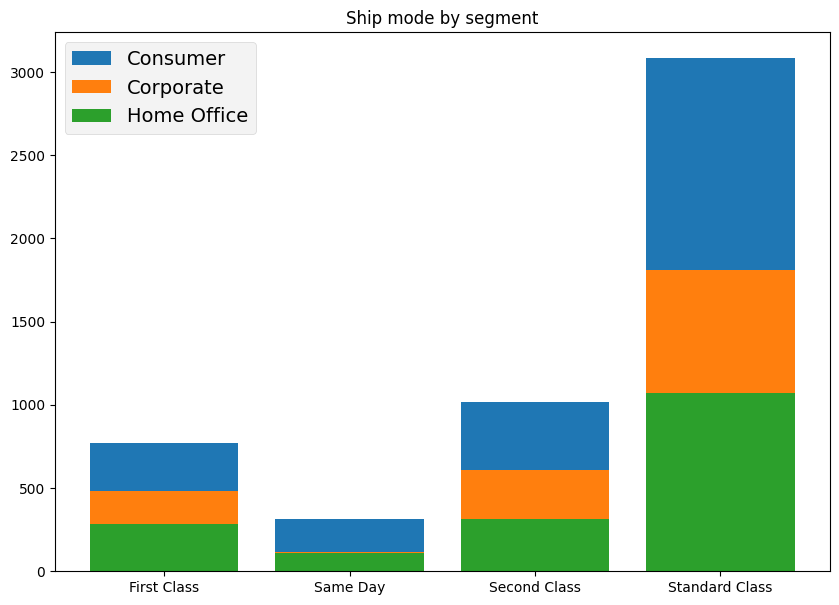

In [8]:
plt.figure(figsize=(10,7))
plt.title('Ship mode by segment')
plt.style.use('fivethirtyeight')

data_y = db.groupby(['Ship Mode', 'Segment'])['Number'].count().reset_index()
data_x = data_y['Ship Mode'].unique()

data1 = data_y['Number'][data_y['Segment']=='Consumer']
data2 = data_y['Number'][data_y['Segment']=='Corporate']
data3 = data_y['Number'][data_y['Segment']=='Home Office']

plt.bar(data_x, data1, label="Consumer")
plt.bar(data_x, data2, label="Corporate")
plt.bar(data_x, data3, label="Home Office")

plt.legend(loc="upper left")
plt.show()

### Top 10 states with the highest number of goods sold?

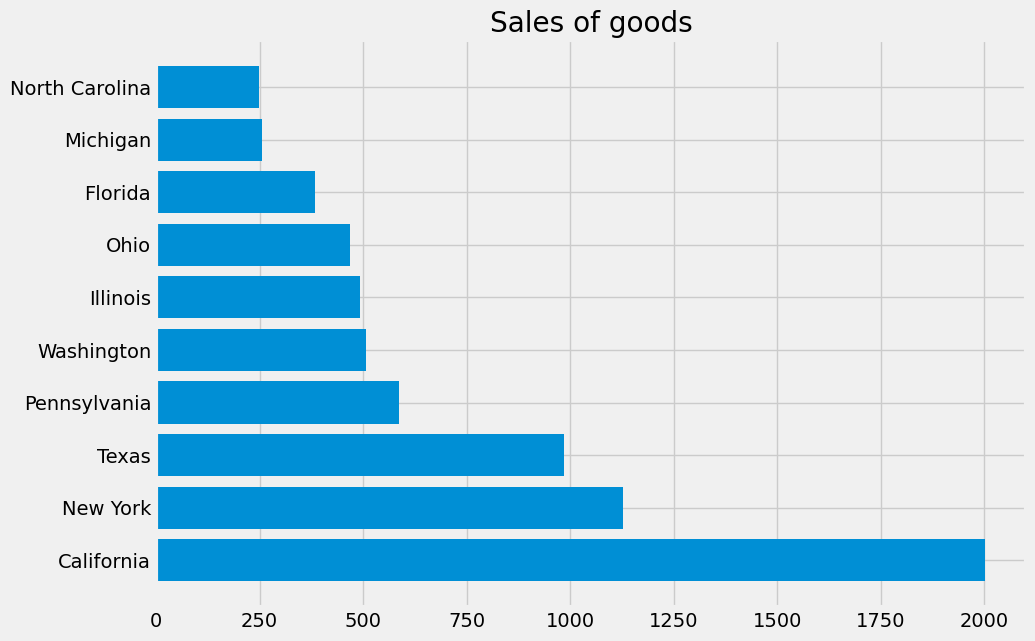

In [9]:
plt.figure(figsize=(10,7))
plt.title('Sales of goods')

goods_by_state = db[['Number', 'State']].groupby('State').count().sort_values('Number', ascending=False)[:10]
plt.barh(goods_by_state.index, goods_by_state['Number'])
plt.show()

### Top 10 states with the highest profit?

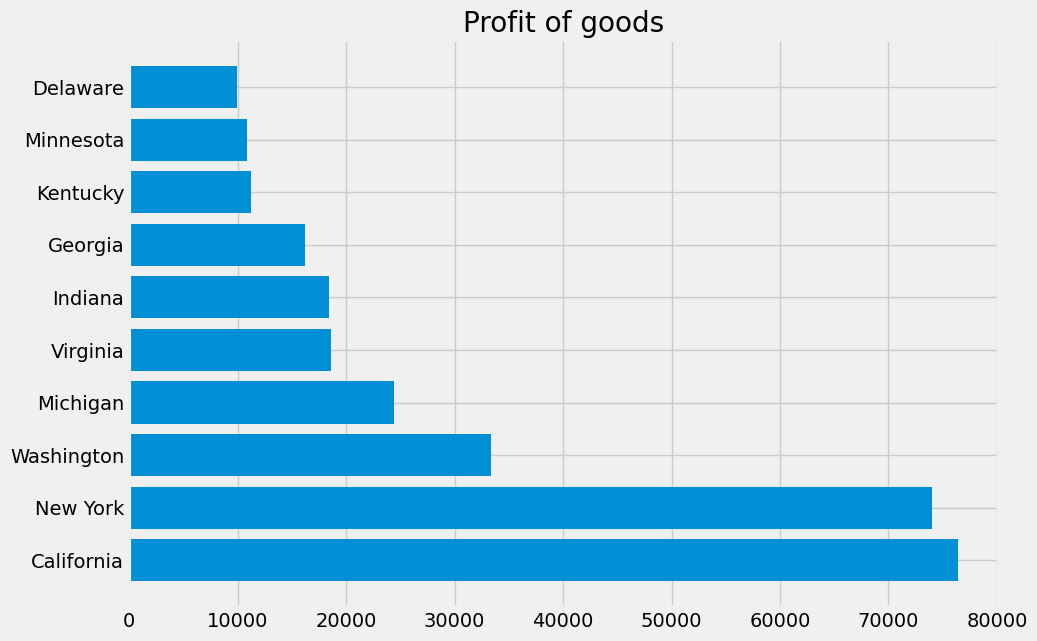

In [10]:
plt.figure(figsize=(10,7))
plt.title('Profit of goods')

profit_by_state = db[['Profit', 'State']].groupby('State').sum().sort_values('Profit', ascending=False)[:10]
plt.barh(profit_by_state.index, profit_by_state['Profit'])
plt.show()

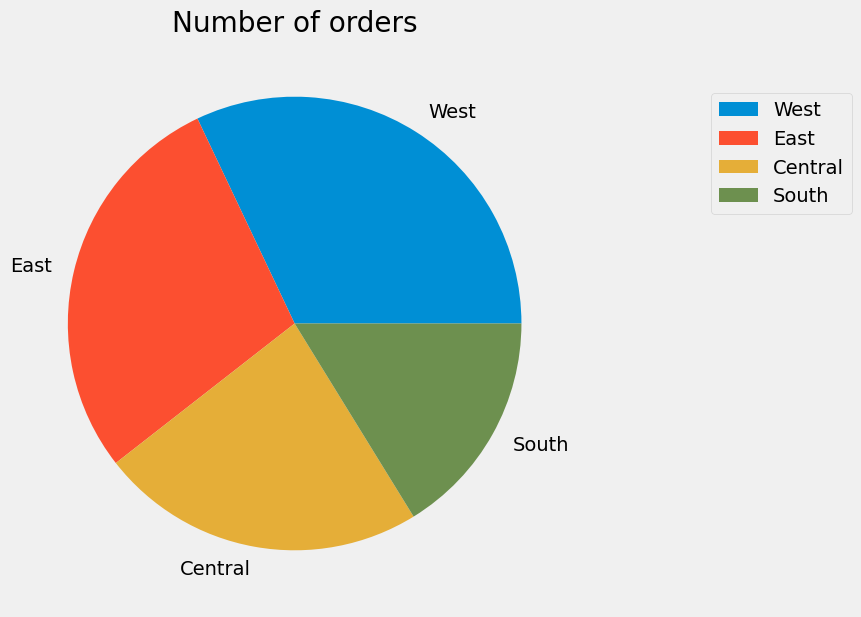

In [11]:
plt.figure(figsize=(10,7))
plt.title('Number of orders')

num_by_region = db[['Number', 'Region']].groupby('Region').count().sort_values('Number', ascending=False)[:10]
mylabels = num_by_region.index.unique()

plt.pie(num_by_region['Number'], labels = mylabels)
plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.8))
plt.show()

### The profit by sub-category?

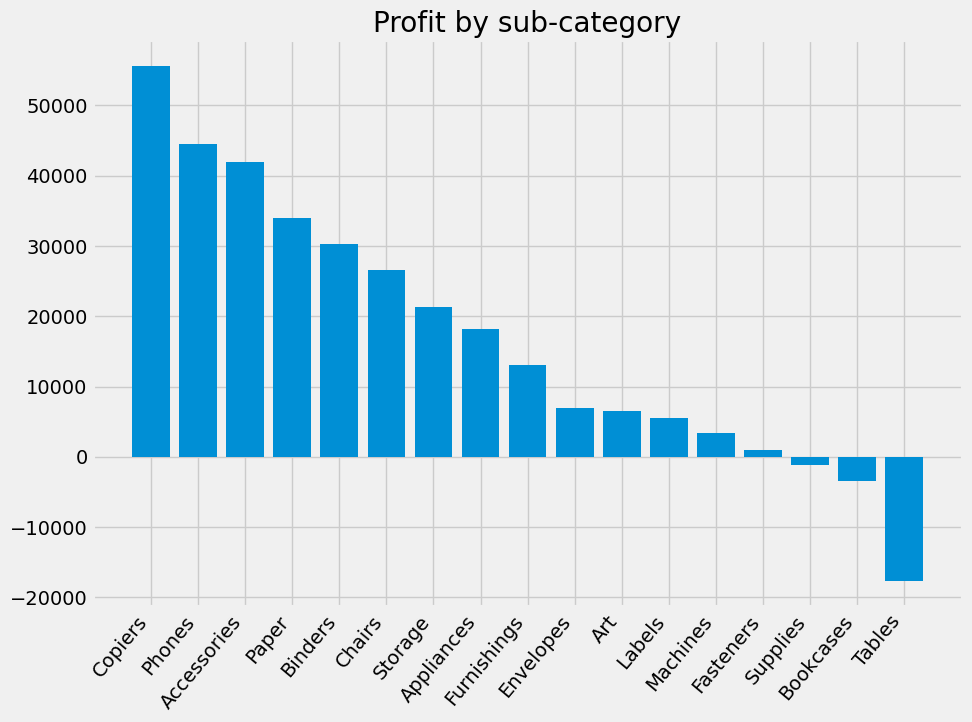

In [12]:
plt.figure(figsize=(10,7))
plt.title('Profit by sub-category')

profit_by_sub_cat = db[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().sort_values('Profit', ascending=False)

plt.bar(profit_by_sub_cat.index, profit_by_sub_cat['Profit'])
plt.xticks(rotation=50, ha='right')
plt.show()

### The profitable and loosing  transactions?

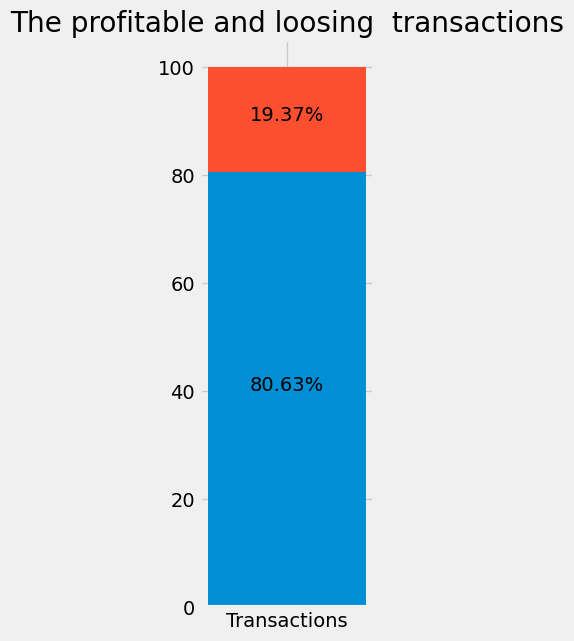

In [13]:
plt.figure(figsize=(2,7))
plt.title('The profitable and loosing  transactions')

p_tran = round(db['Profit'][db['Profit']>0].count() * 100 / db['Profit'].count(), 2)
l_tran = round(db['Profit'][db['Profit']<=0].count() * 100 / db['Profit'].count(), 2)

plt.bar('Transactions', p_tran)
plt.bar('Transactions', l_tran, bottom=p_tran)

plt.text(0, 40, f'{p_tran}%', ha='center')
plt.text(0, 90, f'{l_tran}%', ha='center')

plt.show()

### The top-5 profitable and loosing transactions by sub-category?

In [14]:
profitable_sub_cat = db[['Sub-Category', 'Profit']][db['Profit']>0]
profitable_sub_cat = profitable_sub_cat.groupby('Sub-Category').count().sort_values('Profit', ascending=False)[:5]

loosing_sub_cat = db[['Sub-Category', 'Profit']][db['Profit']<=0]
loosing_sub_cat = loosing_sub_cat.groupby('Sub-Category').count().sort_values('Profit', ascending=False)[:5]

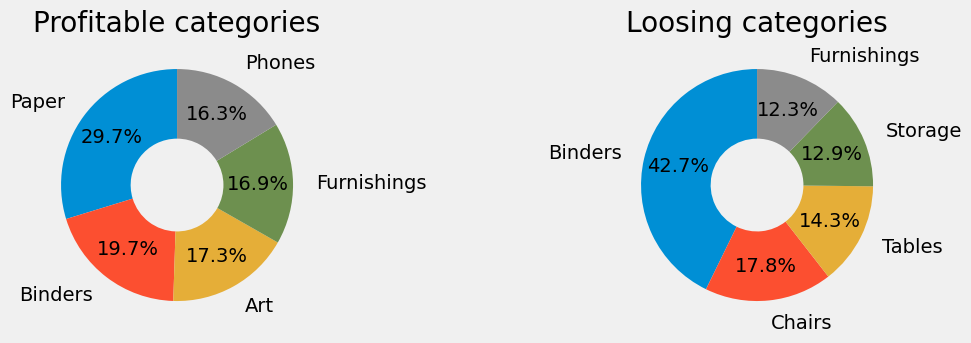

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
plt.subplots_adjust(wspace=1)

ax[0].pie(profitable_sub_cat.Profit,
       wedgeprops={'width':0.6},
       startangle=90,
       labels=profitable_sub_cat.index,
       autopct='%1.1f%%',
       pctdistance=0.7,
       labeldistance=1.2)

ax[1].pie(loosing_sub_cat.Profit,
       wedgeprops={'width':0.6},
       startangle=90,
       labels=loosing_sub_cat.index,
       autopct='%1.1f%%',
       pctdistance=0.7,
       labeldistance=1.2)

ax[0].set_title('Profitable categories')
ax[1].set_title('Loosing categories')
plt.show()

### Amount of discount by sub-category?

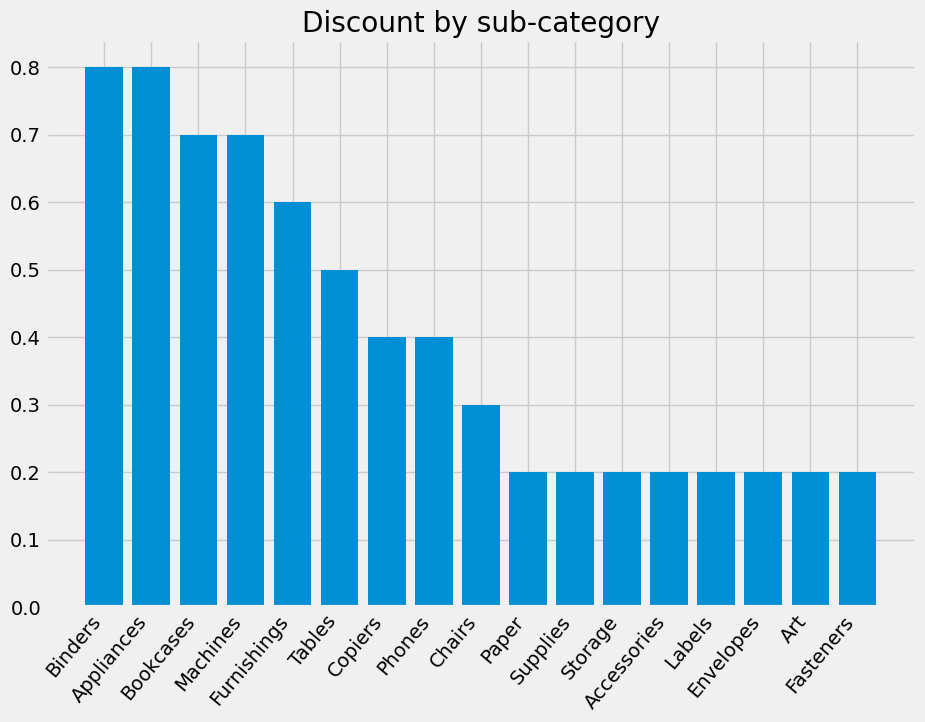

In [16]:
plt.figure(figsize=(10,7))
plt.title('Discount by sub-category')

disc_by_sub_cat = db[['Discount', 'Sub-Category']].groupby('Sub-Category').max().sort_values('Discount', ascending=False)
plt.bar(disc_by_sub_cat.index, disc_by_sub_cat['Discount'])
plt.xticks(rotation=50, ha='right')
plt.show()

### CONCLUSION
<li>Standard class is the most popular shipping method. Same day delivery is in low demand and is not used by corporations at all.
<li>The largest number of products are sold in California, New York and Texas.
<li>The lowest earnings are recorded in North Carolina, Michigan and Florida.
<li>An approximately equal share of sales is distributed between the regions, although the Western region has more.
<li>The maximum income is obtained from subcategories: Copiers, Telephones, Accessories.
<li>Missing or negative income received from the following categories: Tables, Bookcases, Accessories.
<li>About 1/5 of transactions are unprofitable.
<li>The highest discounts in subcategories: Binders, Appliances, Bookcases, and the lowest in: Envelopes, Art, Fasteners.
